In [5]:
import sys 

sys.path.append('..')

import my_cv 

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

## Histogram Equalization  

-  To find an intensity mapping function, f(I)
    - such that the histogram is flat

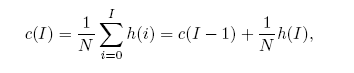

In [3]:
demo_img = cv2.imread('../flowers/daisies_00049.jpg')
print(demo_img.shape)

(1340, 2237, 3)


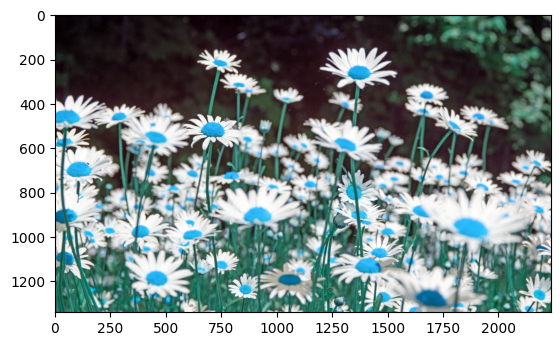

In [4]:
plt.imshow(demo_img)

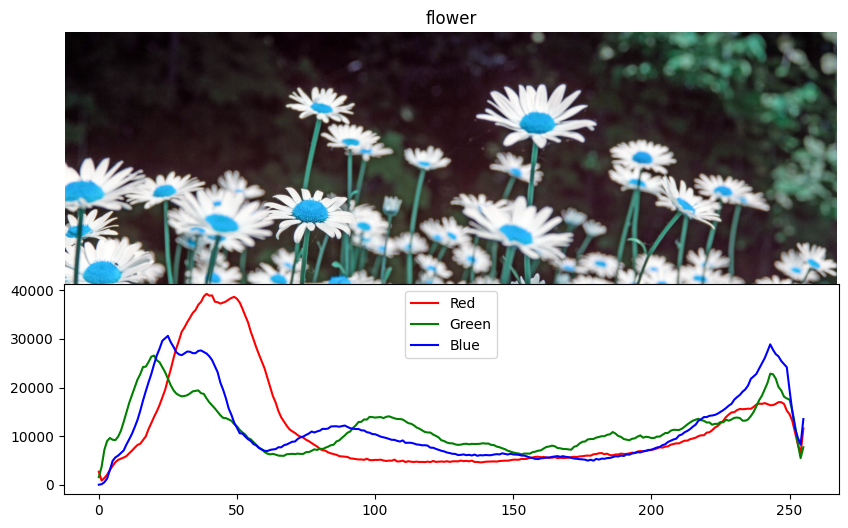

In [6]:
my_cv.plot_hist(demo_img)

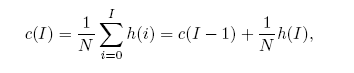

In [8]:
N = np.product(demo_img.shape) 
N

8992740

In [9]:
r,g,b = cv2.split(demo_img)
r.shape

(1340, 2237)

In [14]:
def return_cI(color_channel):
    N = np.prod(color_channel.shape)
    c_i = np.zeros_like(color_channel)
    for x in range(color_channel.shape[0]):
        for y in range(color_channel.shape[1]):
            c_i[x][y] =  c_i[x-1][y-1] + color_channel[x][y]/N 

    return c_i 

In [24]:
r_c_i = return_cI(r)[:,:,np.newaxis]
g_c_i = return_cI(g)[:,:,np.newaxis]
b_c_i = return_cI(b)[:,:,np.newaxis]

In [26]:
g_c_i.shape

(1340, 2237, 1)

In [29]:
integrated_image = np.concatenate((r_c_i,  g_c_i, b_c_i), axis=2)
print(integrated_image.shape, demo_img.shape)

(1340, 2237, 3) (1340, 2237, 3)


In [31]:
integrated_image[0, 0, :], demo_img[0, 0, :]

(array([0, 0, 0], dtype=uint8), array([9, 6, 8], dtype=uint8))

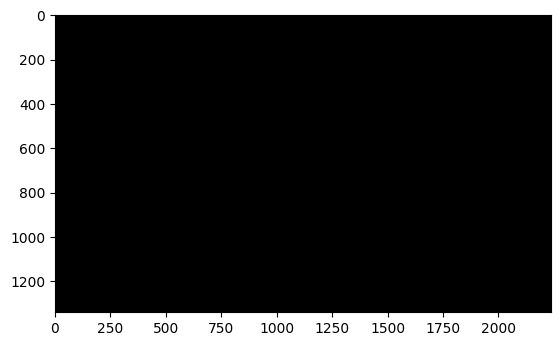

In [32]:
plt.imshow(integrated_image)

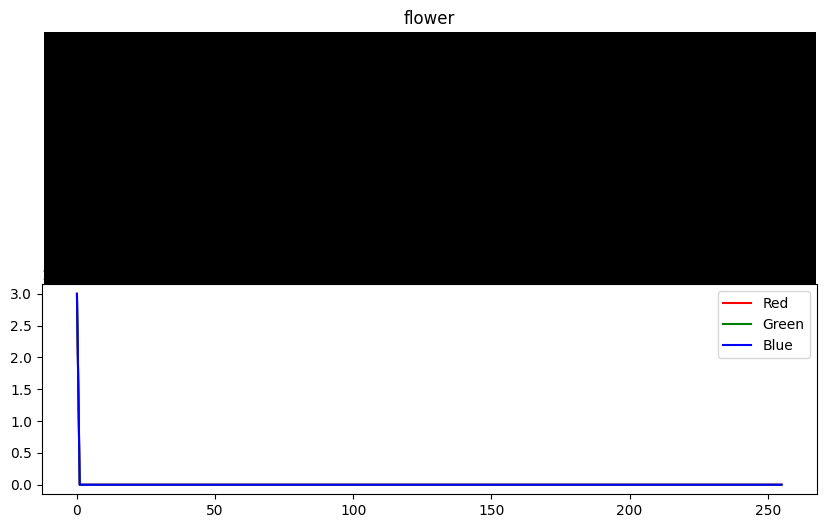

In [33]:
my_cv.plot_hist(integrated_image)